# Seaborn Versus Matplotlib

In [2]:
#import packages

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
#create some random walk data
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y=np.cumsum(rng.randn(500,6),0)

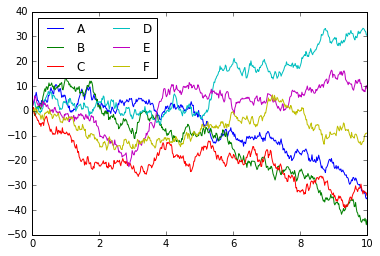

In [4]:
#plot data with matplotlib defaults
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [5]:
#plot data with seaborn
import seaborn as sns
sns.set()

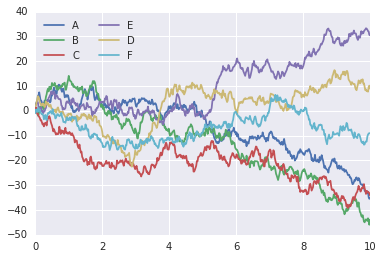

In [6]:
plt.plot(x,y)
plt.legend('ABCEDF', ncol=2, loc='upper left')

# Exploring Seaborn Plots

/home/snaily/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


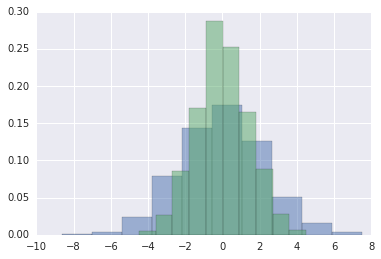

In [10]:
# Histograms

data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns = ['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed = True, alpha=0.5)

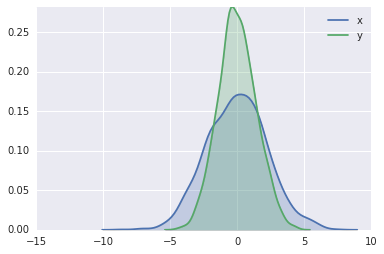

In [11]:
#KDEplot 
#smooth estimate of the distribution using a kernel density estimation

for col in 'xy':
    sns.kdeplot(data[col], shade=True)

/home/snaily/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/snaily/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


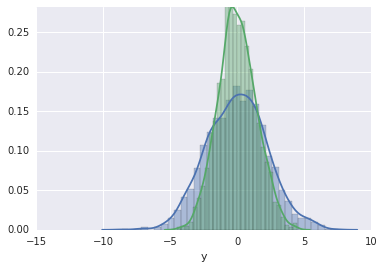

In [12]:
#Histograms and KDE can be combined using distplot

sns.distplot(data['x'])
sns.distplot(data['y'])

/home/snaily/.local/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


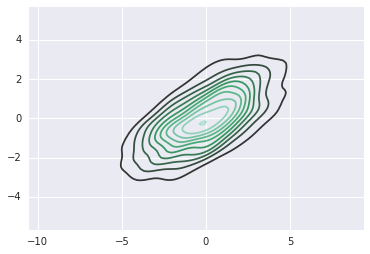

In [13]:
#for 2-D dataset kdeplot 
sns.kdeplot(data)

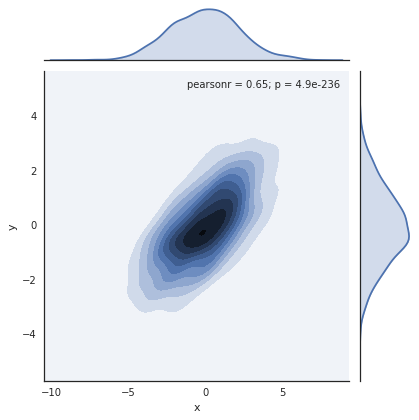

In [14]:
#use joint distribution and marginal distribution together
with sns.axes_style('white'):
    sns.jointplot('x','y',data, kind='kde')

/home/snaily/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/snaily/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


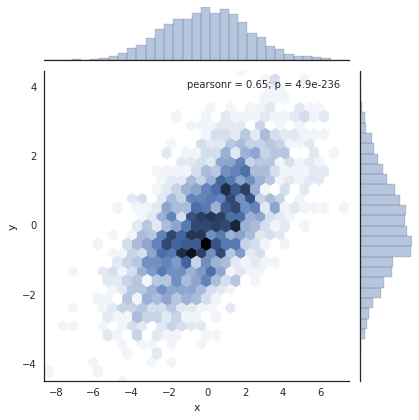

In [15]:
#hexagonally based histogram
with sns.axes_style('white'):
    sns.jointplot('x','y',data, kind='hex')

# Pair plots

#when you generalize joint plots to datasets of larger dimensions

In [18]:
#load iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


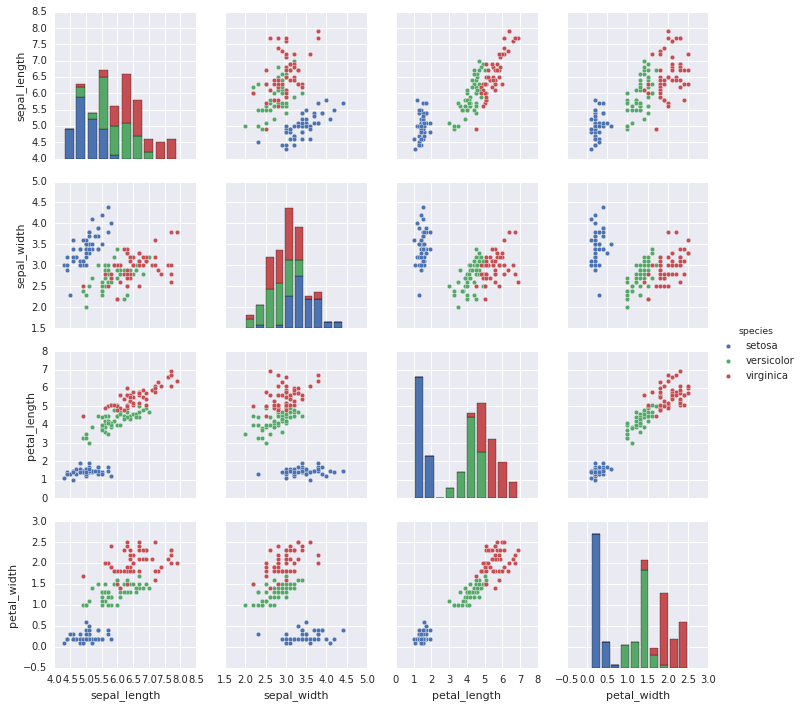

In [19]:
#plot all pairs of values against each other
sns.pairplot(iris, hue='species', size=2.5)

# Faceted histograms

In [20]:
#histograms of subsets

#load dataset of tips recived by restaurant staff
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


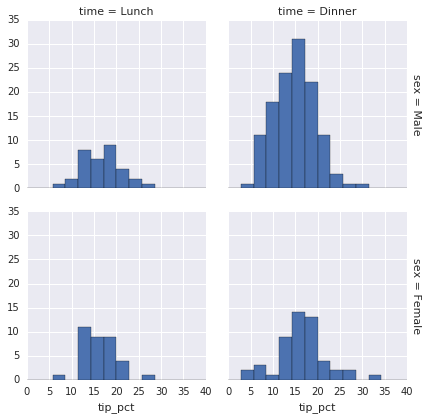

In [21]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles = True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0,40,15));

# Factor plots

View the distribution of a parameter within bins defined by any other parameter

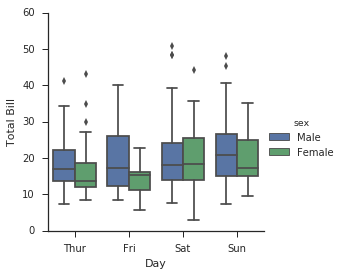

In [22]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', data=tips, kind='box')
    g.set_axis_labels('Day', 'Total Bill')

# Joint Distributions

To show the joint distribution between different datasets, along with the associated marginal distributions

/home/snaily/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/snaily/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


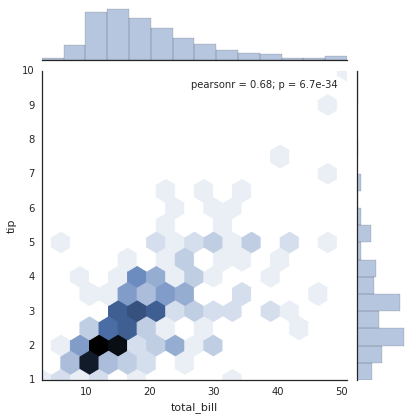

In [26]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex')

Automatic kernel density estimation and regression

/home/snaily/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/snaily/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


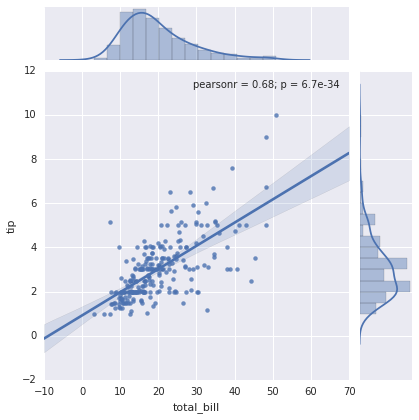

In [27]:
sns.jointplot('total_bill', 'tip', data=tips, kind='reg')

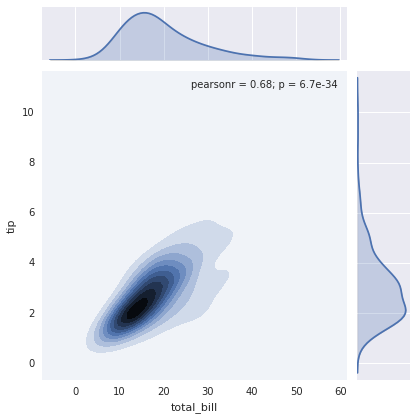

In [28]:
sns.jointplot('total_bill', 'tip', data=tips, kind='kde')

# Bar plots

In [29]:
#load planets dataset
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


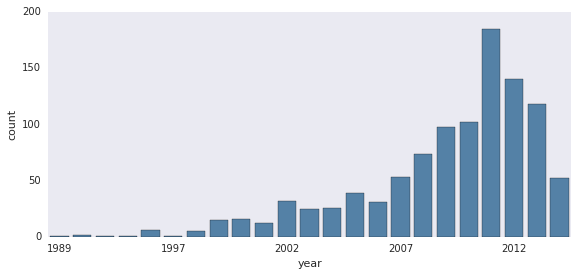

In [30]:
with sns.axes_style('dark'):
    g = sns.factorplot('year', data=planets, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels(step=5)

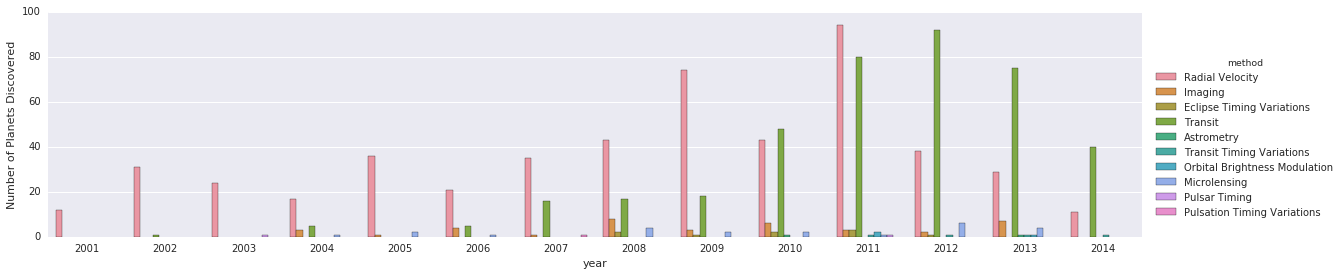

In [34]:
with sns.axes_style('darkgrid'):
    g = sns.factorplot('year', data=planets, aspect=4.0, kind='count', hue='method', order=range(2001,2015))
    g.set_ylabels('Number of Planets Discovered')